<a href="https://colab.research.google.com/github/priyanka-gyan/Solar-Panel-Data-Classification/blob/main/Solar_panel_data_classification_by_PriyankaGyanchandani.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline 

import warnings
warnings.filterwarnings("ignore")


Importing Power Generation & Weather Sensor Data¶


In [29]:
generation_data = pd.read_csv('/content/Plant_1_Generation_Data.csv')
weather_data = pd.read_csv('/content/Plant_1_Weather_Sensor_Data.csv')

In [30]:
generation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    68778 non-null  object 
 1   PLANT_ID     68778 non-null  int64  
 2   SOURCE_KEY   68778 non-null  object 
 3   DC_POWER     68778 non-null  float64
 4   AC_POWER     68778 non-null  float64
 5   DAILY_YIELD  68778 non-null  float64
 6   TOTAL_YIELD  68778 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.7+ MB


In [31]:
generation_data.sample(5).style.set_properties(
    **{
        'background-color': 'orange',
        'color': 'black',
        'border-color': 'darkblack'
    })

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
45544,06-06-2020 23:15,4135001,zBIq5rxdHJRwDNY,0.000000,0.000000,0.000000,6506728.000000
55761,11-06-2020 19:30,4135001,YxYtjZvoooNbGkE,0.000000,0.000000,5592.000000,7385279.000000
9804,19-05-2020 20:30,4135001,adLQvlD726eNBSB,0.000000,0.000000,0.000000,6304513.000000
2606,16-05-2020 09:15,4135001,sjndEbLyjtCKgGv,5845.428571,572.800000,1029.571429,7024211.571000
38130,03-06-2020 09:15,4135001,McdE0feGgRqW7Ca,6440.500000,630.887500,977.500000,7301336.500000


In [32]:
weather_data.sample(5).style.set_properties(
    **{
        'background-color': 'olive',
        'color': 'Black',
        'border-color': 'darkblack'
    })

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
2532,2020-06-11 05:30:00,4135001,HmiyD2TTLFNqkNe,21.764787,20.289380,0.000000
1558,2020-06-01 01:45:00,4135001,HmiyD2TTLFNqkNe,22.151638,20.045486,0.000000
929,2020-05-25 08:15:00,4135001,HmiyD2TTLFNqkNe,24.931500,34.992004,0.444573
911,2020-05-25 03:45:00,4135001,HmiyD2TTLFNqkNe,23.539119,22.201566,0.000000
948,2020-05-25 13:00:00,4135001,HmiyD2TTLFNqkNe,32.788692,60.102559,0.945329


Adjust datetime format¶


In [33]:
generation_data['DATE'] = pd.to_datetime(generation_data['DATE_TIME']).dt.date
generation_data['TIME'] = pd.to_datetime(generation_data['DATE_TIME']).dt.time
weather_data['DATE'] = pd.to_datetime(weather_data['DATE_TIME']).dt.date
weather_data['TIME'] = pd.to_datetime(weather_data['DATE_TIME']).dt.time

In [34]:
generation_data.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,DATE,TIME
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,2020-05-15,00:00:00
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0,2020-05-15,00:00:00
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0,2020-05-15,00:00:00
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0,2020-05-15,00:00:00
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0,2020-05-15,00:00:00


In [35]:
weather_data.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DATE,TIME
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,2020-05-15,00:00:00
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0,2020-05-15,00:15:00
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0,2020-05-15,00:30:00
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0,2020-05-15,00:45:00
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0,2020-05-15,01:00:00


In [36]:
del generation_data['DATE_TIME']
del weather_data['DATE_TIME']

In [37]:
generation_data['DATE_TIME'] = generation_data["DATE"].astype(str) + " " + generation_data["TIME"].astype(str)

In [38]:
weather_data['DATE_TIME'] = weather_data["DATE"].astype(str) + " " + weather_data["TIME"].astype(str)

In [39]:
generation_data['DATE_TIME']

0        2020-05-15 00:00:00
1        2020-05-15 00:00:00
2        2020-05-15 00:00:00
3        2020-05-15 00:00:00
4        2020-05-15 00:00:00
                ...         
68773    2020-06-17 23:45:00
68774    2020-06-17 23:45:00
68775    2020-06-17 23:45:00
68776    2020-06-17 23:45:00
68777    2020-06-17 23:45:00
Name: DATE_TIME, Length: 68778, dtype: object

In [40]:
gd1=generation_data
del gd1['DATE']
del gd1['TIME']
gd1

,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,DATE_TIME
0,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.000,6259559.0,2020-05-15 00:00:00
1,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.000,6183645.0,2020-05-15 00:00:00
2,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.000,6987759.0,2020-05-15 00:00:00
3,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.000,7602960.0,2020-05-15 00:00:00
4,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.000,7158964.0,2020-05-15 00:00:00
...,...,...,...,...,...,...,...
68773,4135001,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0,2020-06-17 23:45:00
68774,4135001,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0,2020-06-17 23:45:00
68775,4135001,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0,2020-06-17 23:45:00
68776,4135001,zBIq5rxdHJRwDNY,0.0,0.0,5817.000,6583369.0,2020-06-17 23:45:00


In [41]:
gd1['DATE_TIME'] =  pd.to_datetime(gd1['DATE_TIME'], format='%Y-%m-%d')


In [42]:
gd1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   PLANT_ID     68778 non-null  int64         
 1   SOURCE_KEY   68778 non-null  object        
 2   DC_POWER     68778 non-null  float64       
 3   AC_POWER     68778 non-null  float64       
 4   DAILY_YIELD  68778 non-null  float64       
 5   TOTAL_YIELD  68778 non-null  float64       
 6   DATE_TIME    68778 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 3.7+ MB


In [43]:
wd1=weather_data
del wd1['DATE']
del wd1['TIME']
wd1

,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DATE_TIME
0,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,2020-05-15 00:00:00
1,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0,2020-05-15 00:15:00
2,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0,2020-05-15 00:30:00
3,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0,2020-05-15 00:45:00
4,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0,2020-05-15 01:00:00
...,...,...,...,...,...,...
3177,4135001,HmiyD2TTLFNqkNe,22.150570,21.480377,0.0,2020-06-17 22:45:00
3178,4135001,HmiyD2TTLFNqkNe,22.129816,21.389024,0.0,2020-06-17 23:00:00
3179,4135001,HmiyD2TTLFNqkNe,22.008275,20.709211,0.0,2020-06-17 23:15:00
3180,4135001,HmiyD2TTLFNqkNe,21.969495,20.734963,0.0,2020-06-17 23:30:00


Converting object date_time into daytime stamping

In [44]:
wd1['DATE_TIME'] =  pd.to_datetime(wd1['DATE_TIME'], format='%Y-%m-%d')

In [45]:
wd1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   PLANT_ID             3182 non-null   int64         
 1   SOURCE_KEY           3182 non-null   object        
 2   AMBIENT_TEMPERATURE  3182 non-null   float64       
 3   MODULE_TEMPERATURE   3182 non-null   float64       
 4   IRRADIATION          3182 non-null   float64       
 5   DATE_TIME            3182 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 149.3+ KB


Merging generation data and weather sensor data¶


In [46]:
df_solar = pd.merge(gd1.drop(columns = ['PLANT_ID']), wd1.drop(columns = ['PLANT_ID', 'SOURCE_KEY']), on='DATE_TIME')
df_solar.sample(5).style.background_gradient(cmap='cool')

,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,DATE_TIME,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
14446,WRmjgnKYAwPKWDb,10018.285710,979.557143,6141.714286,7083499.714000,2020-05-22 14:45:00,32.801117,56.020087,0.779872
37109,ZoEaEvLYb1n2sOq,0.000000,0.000000,8378.000000,7315763.000000,2020-06-13 22:00:00,22.700739,20.306745,0.000000
15423,bvBOhCH3iADSZry,0.000000,0.000000,0.000000,6368908.000000,2020-05-23 02:45:00,21.891612,20.528487,0.000000
38734,WRmjgnKYAwPKWDb,2845.428571,279.342857,7175.714286,7254354.714000,2020-06-14 16:30:00,26.423556,32.757710,0.199226
1025,bvBOhCH3iADSZry,8394.428571,821.228571,2185.142857,6318988.143000,2020-05-15 11:45:00,30.811049,47.836383,0.467987


Adding separate time and date columns¶


In [47]:
# adding separate time and date columns
df_solar["DATE"] = pd.to_datetime(df_solar["DATE_TIME"]).dt.date
df_solar["TIME"] = pd.to_datetime(df_solar["DATE_TIME"]).dt.time
df_solar['DAY'] = pd.to_datetime(df_solar['DATE_TIME']).dt.day
df_solar['MONTH'] = pd.to_datetime(df_solar['DATE_TIME']).dt.month
df_solar['WEEK'] = pd.to_datetime(df_solar['DATE_TIME']).dt.week


# add hours and minutes for ml models
df_solar['HOURS'] = pd.to_datetime(df_solar['TIME'],format='%H:%M:%S').dt.hour
df_solar['MINUTES'] = pd.to_datetime(df_solar['TIME'],format='%H:%M:%S').dt.minute
df_solar['TOTAL MINUTES PASS'] = df_solar['MINUTES'] + df_solar['HOURS']*60

# add date as string column
df_solar["DATE_STRING"] = df_solar["DATE"].astype(str) # add column with date as string
df_solar["HOURS"] = df_solar["HOURS"].astype(str)
df_solar["TIME"] = df_solar["TIME"].astype(str)

df_solar.head(2)

,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,DATE_TIME,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DATE,TIME,DAY,MONTH,WEEK,HOURS,MINUTES,TOTAL MINUTES PASS,DATE_STRING
0,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,2020-05-15,25.184316,22.857507,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15
1,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0,2020-05-15,25.184316,22.857507,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15


In [48]:
df_solar.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 45680 entries, 0 to 45679
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   SOURCE_KEY           45680 non-null  object        
 1   DC_POWER             45680 non-null  float64       
 2   AC_POWER             45680 non-null  float64       
 3   DAILY_YIELD          45680 non-null  float64       
 4   TOTAL_YIELD          45680 non-null  float64       
 5   DATE_TIME            45680 non-null  datetime64[ns]
 6   AMBIENT_TEMPERATURE  45680 non-null  float64       
 7   MODULE_TEMPERATURE   45680 non-null  float64       
 8   IRRADIATION          45680 non-null  float64       
 9   DATE                 45680 non-null  object        
 10  TIME                 45680 non-null  object        
 11  DAY                  45680 non-null  int64         
 12  MONTH                45680 non-null  int64         
 13  WEEK                 45680 non-

finding null values


In [49]:
df_solar.isnull().sum()

SOURCE_KEY             0
DC_POWER               0
AC_POWER               0
DAILY_YIELD            0
TOTAL_YIELD            0
DATE_TIME              0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
DATE                   0
TIME                   0
DAY                    0
MONTH                  0
WEEK                   0
HOURS                  0
MINUTES                0
TOTAL MINUTES PASS     0
DATE_STRING            0
dtype: int64

There is no Missing Values in the dataset

In [50]:
df_solar.describe().style.background_gradient(cmap='rainbow')

,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DAY,MONTH,WEEK,MINUTES,TOTAL MINUTES PASS
count,45680.000000,45680.000000,45680.000000,45680.000000,45680.000000,45680.000000,45680.000000,45680.000000,45680.000000,45680.000000,45680.000000,45680.000000
mean,3197.175971,312.652679,3313.146538,6957007.021147,25.917168,31.877975,0.236834,20.414317,5.275131,22.090543,22.484895,719.701182
std,4080.448523,398.668968,3156.100252,417238.643557,3.556550,12.638448,0.306316,6.258661,0.446585,1.568935,16.777147,410.155042
min,0.000000,0.000000,0.000000,6183645.000000,20.398505,18.140415,0.000000,6.000000,5.000000,20.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,6512357.875000,22.930031,21.406390,0.000000,16.000000,5.000000,21.000000,0.000000,375.000000
50%,464.196429,44.912500,2653.633928,7115710.714000,24.993020,25.379072,0.035266,20.000000,5.000000,22.000000,15.000000,720.000000
75%,6478.424107,634.481250,6318.000000,7244521.410750,28.379008,42.757119,0.459503,26.000000,6.000000,23.000000,30.000000,1065.000000
max,14471.125000,1410.950000,9163.000000,7846821.000000,35.252486,65.545714,1.221652,31.000000,6.000000,25.000000,45.000000,1425.000000


Converting 'SOURCE_KEY' from categorical form to numerical form

In [51]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df_solar['SOURCE_KEY_NUMBER'] = encoder.fit_transform(df_solar['SOURCE_KEY'])
df_solar.head()

,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,DATE_TIME,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DATE,TIME,DAY,MONTH,WEEK,HOURS,MINUTES,TOTAL MINUTES PASS,DATE_STRING,SOURCE_KEY_NUMBER
0,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,2020-05-15,25.184316,22.857507,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15,0
1,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0,2020-05-15,25.184316,22.857507,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15,1
2,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0,2020-05-15,25.184316,22.857507,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15,2
3,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0,2020-05-15,25.184316,22.857507,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15,3
4,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0,2020-05-15,25.184316,22.857507,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15,4


Data Visualization¶


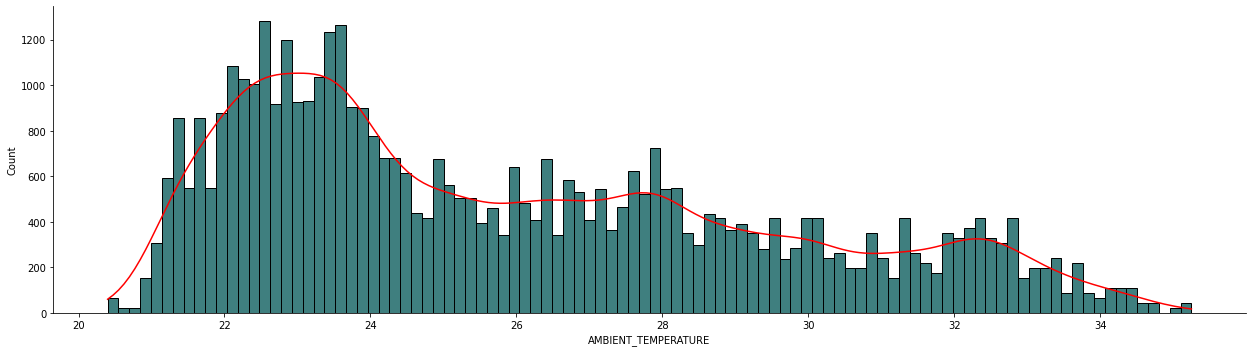

In [52]:
sns.displot(data=df_solar, x="AMBIENT_TEMPERATURE", kde=True, bins = 100,color = "red", facecolor = "#3F7F7F",height = 5, aspect = 3.5);

In [53]:
df_solar['DATE'].nunique()

23

The data of solar power generation is of 23 days
Faults & Abnormalities detection in solar power plant generation
Multiple Plotting of DC_POWER generation on per day basis.

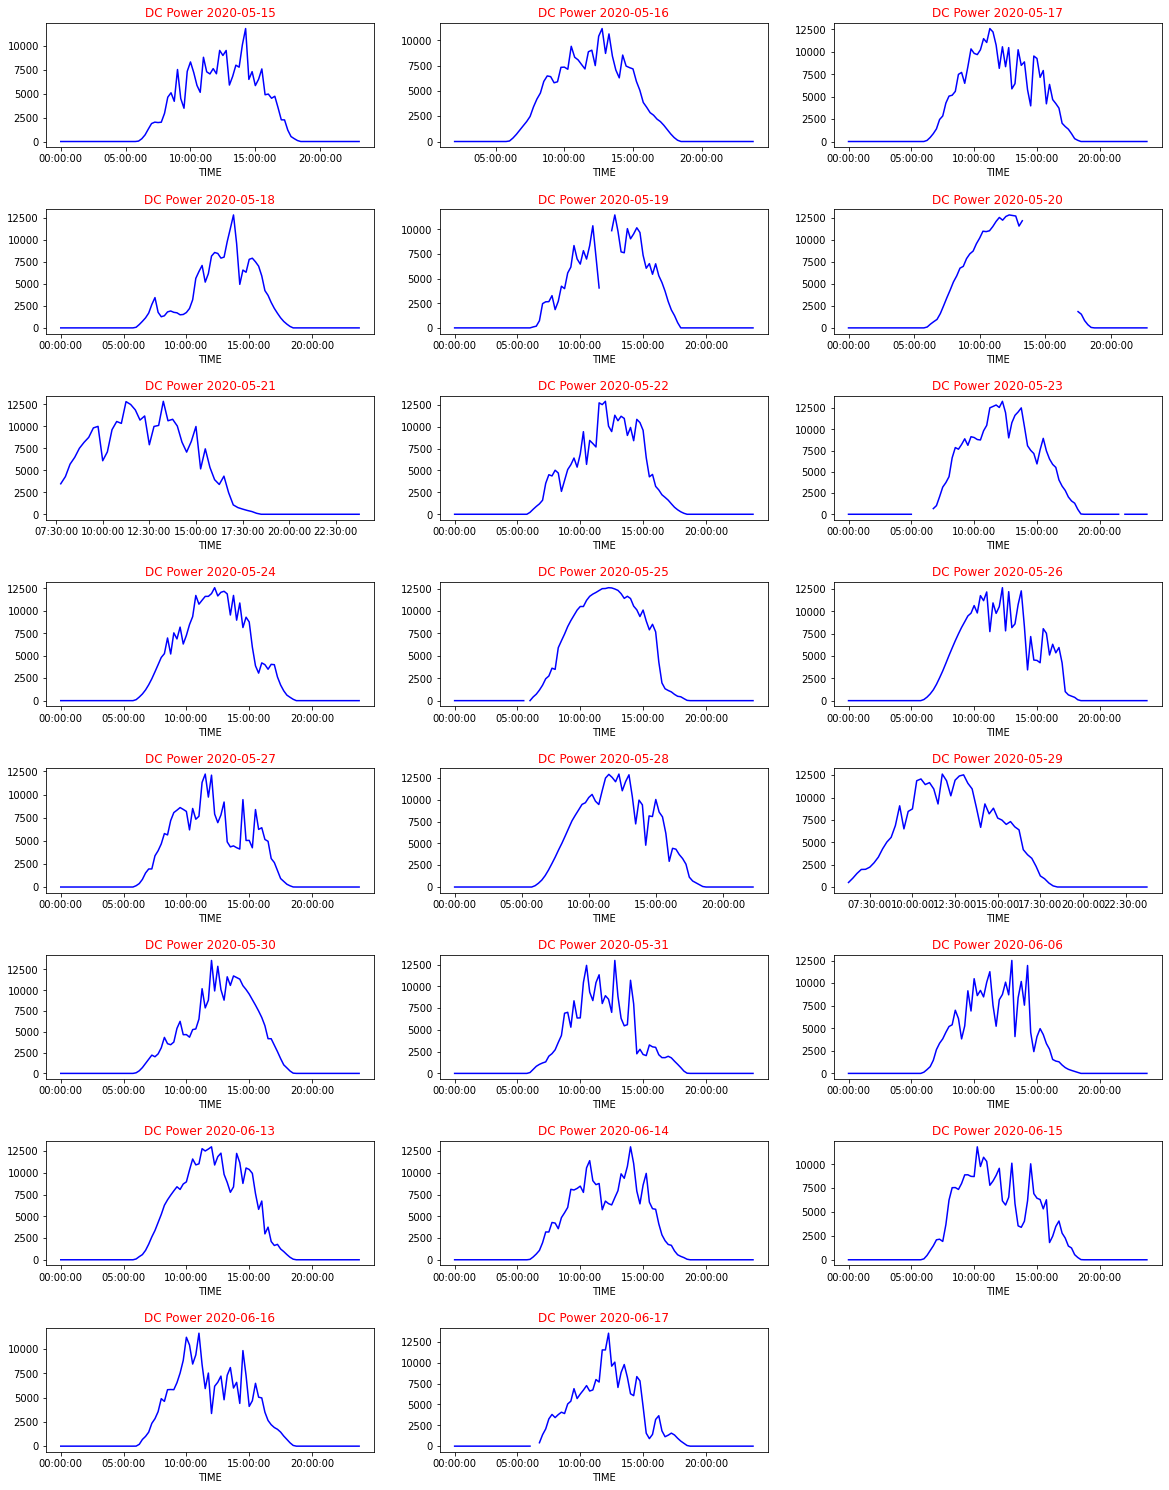

In [54]:
solar_dc = df_solar.pivot_table(values='DC_POWER', index='TIME', columns='DATE')

def Daywise_plot(data= None, row = None, col = None, title='DC Power'):
    cols = data.columns # take all column
    gp = plt.figure(figsize=(20,40)) 
    
    gp.subplots_adjust(wspace=0.2, hspace=0.5)
    for i in range(1, len(cols)+1):
        ax = gp.add_subplot(row,col, i)
        data[cols[i-1]].plot(ax=ax, color='blue')
        ax.set_title('{} {}'.format(title, cols[i-1]),color='red')
        
Daywise_plot(data=solar_dc, row=12, col=3)

above per day DC_POWER generation graph shows that there is a some fluctuation in the Solar power generation.

Less Fluctuation in DC_POWER generation is observed in the below mentioned days.

    2020-05-15
    2020-05-18
    2020-05-22
    2020-05-23
    2020-05-24
    2020-05-25
    2020-05-26

High Fluctuation in DC_POWER generation is observed in the below mentioned days.

    2020-05-19
    2020-05-28
    2020-05-29
    2020-06-02
    2020-06-03
    2020-06-04
    2020-06-13
    2020-06-14
    2020-06-17

Very High Fluctuation & Reduction in DC_POWER generation is observed in in the below mentioned days.



    2020-06-03
    2020-06-11
    2020-06-12
    2020-06-15

Note: Reason for very high Fluctuation & Reduction in DC_POWER generation is due to fault in the system or may be fluctuation in weather or due to clouds etc. which need to be analyse further

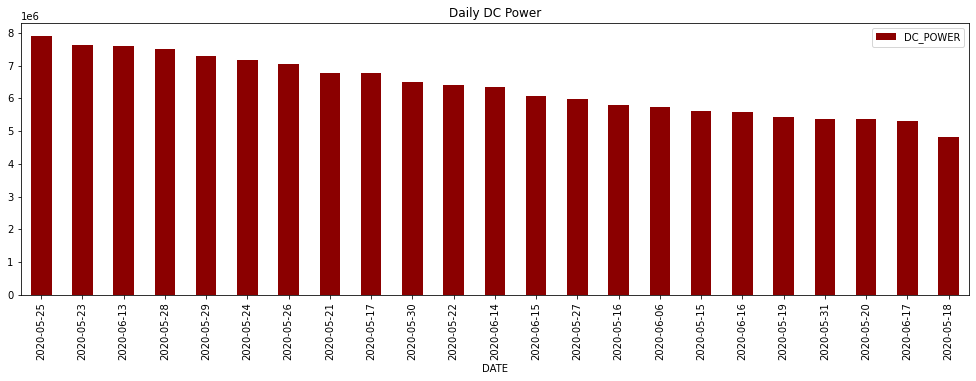

In [56]:
daily_dc = df_solar.groupby('DATE')['DC_POWER'].agg('sum')

ax = daily_dc.sort_values(ascending=False).plot.bar(figsize=(17,5), legend=True,color='darkred')
plt.title('Daily DC Power')
plt.show()

Form the per day DC_POWER generation graph we can find the average power generation per day

Highest average DC_POWER Generation is on: 2020-05-25

Lowest average DC_POWER Generation is on : 2020-05-18

NOTE: This Large variation in the DC_POWER generation is due to the fault in the system or due to weather change, which needs to study further. But from this bar plot we find the day on which there is highest DC_POWER is generated and the day with the lowest DC_POWER generated.
Multiple Plotting of IRRADIATION generation on per day basis.

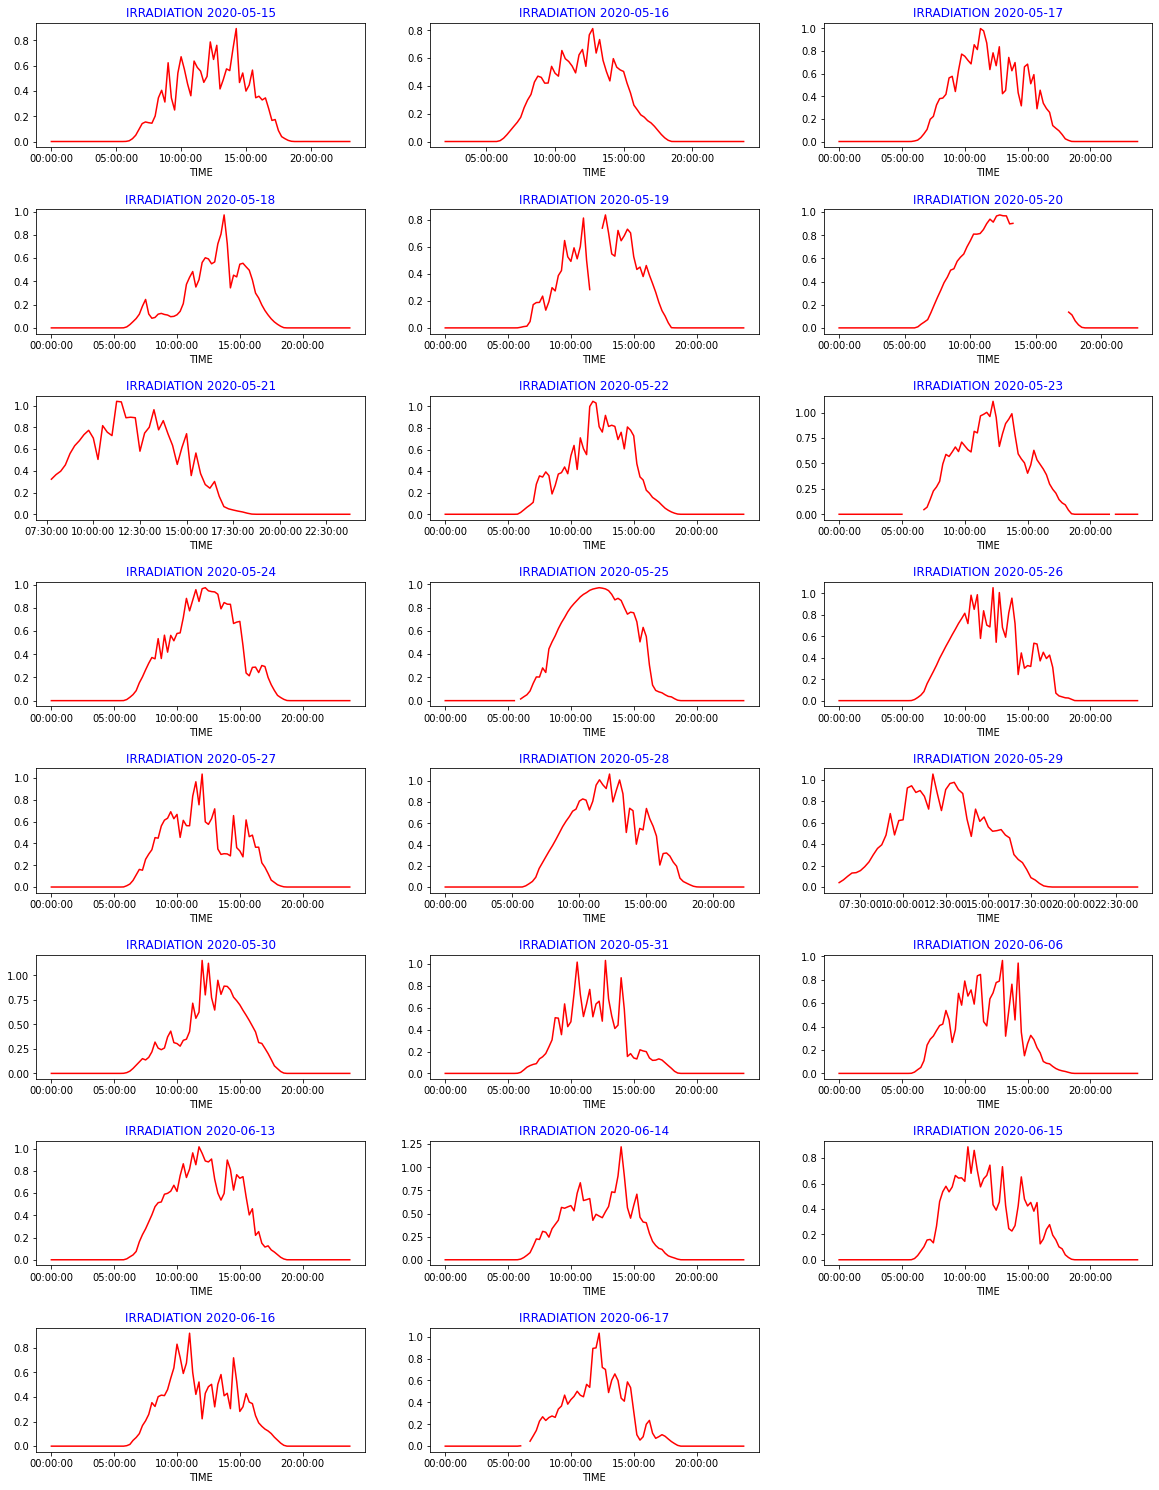

In [57]:
solar_irradiation = df_solar.pivot_table(values='IRRADIATION', index='TIME', columns='DATE')

def Daywise_plot(data= None, row = None, col = None, title='IRRADIATION'):
    cols = data.columns # take all column
    gp = plt.figure(figsize=(20,40)) 
    
    gp.subplots_adjust(wspace=0.2, hspace=0.5)
    for i in range(1, len(cols)+1):
        ax = gp.add_subplot(row,col, i)
        data[cols[i-1]].plot(ax=ax, color='red')
        ax.set_title('{} {}'.format(title, cols[i-1]),color='blue')
        
Daywise_plot(data=solar_irradiation, row=12, col=3)

In solar power plant DC_POWER or Output power mostly depends on the IRRADIATION received from the sun .Or it is not wrong to say that generation is directly proportional to IRRADIATION.

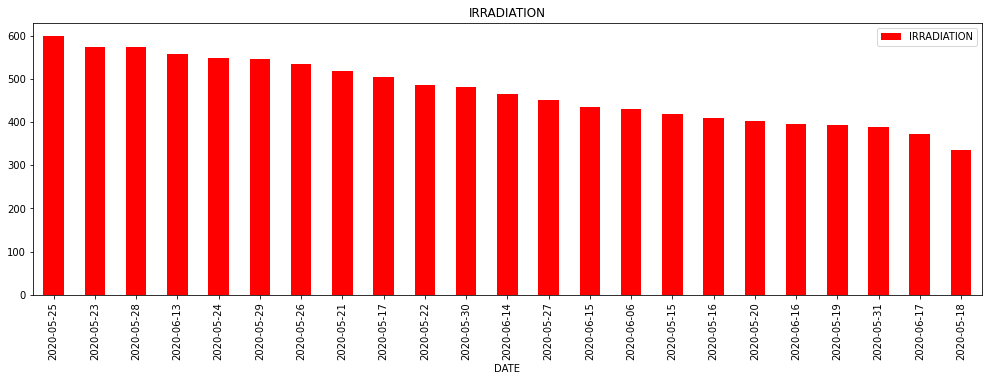

In [58]:
daily_irradiation = df_solar.groupby('DATE')['IRRADIATION'].agg('sum')

daily_irradiation.sort_values(ascending=False).plot.bar(figsize=(17,5), legend=True,color='red')
plt.title('IRRADIATION')
plt.show()


Form the per day IRRADIATION graph we can find the average IRREDIATION per day.
Highest average IRRADIATION is on: 2020-05-25

Lowest average IRRADIATION is on : 2020-05-18

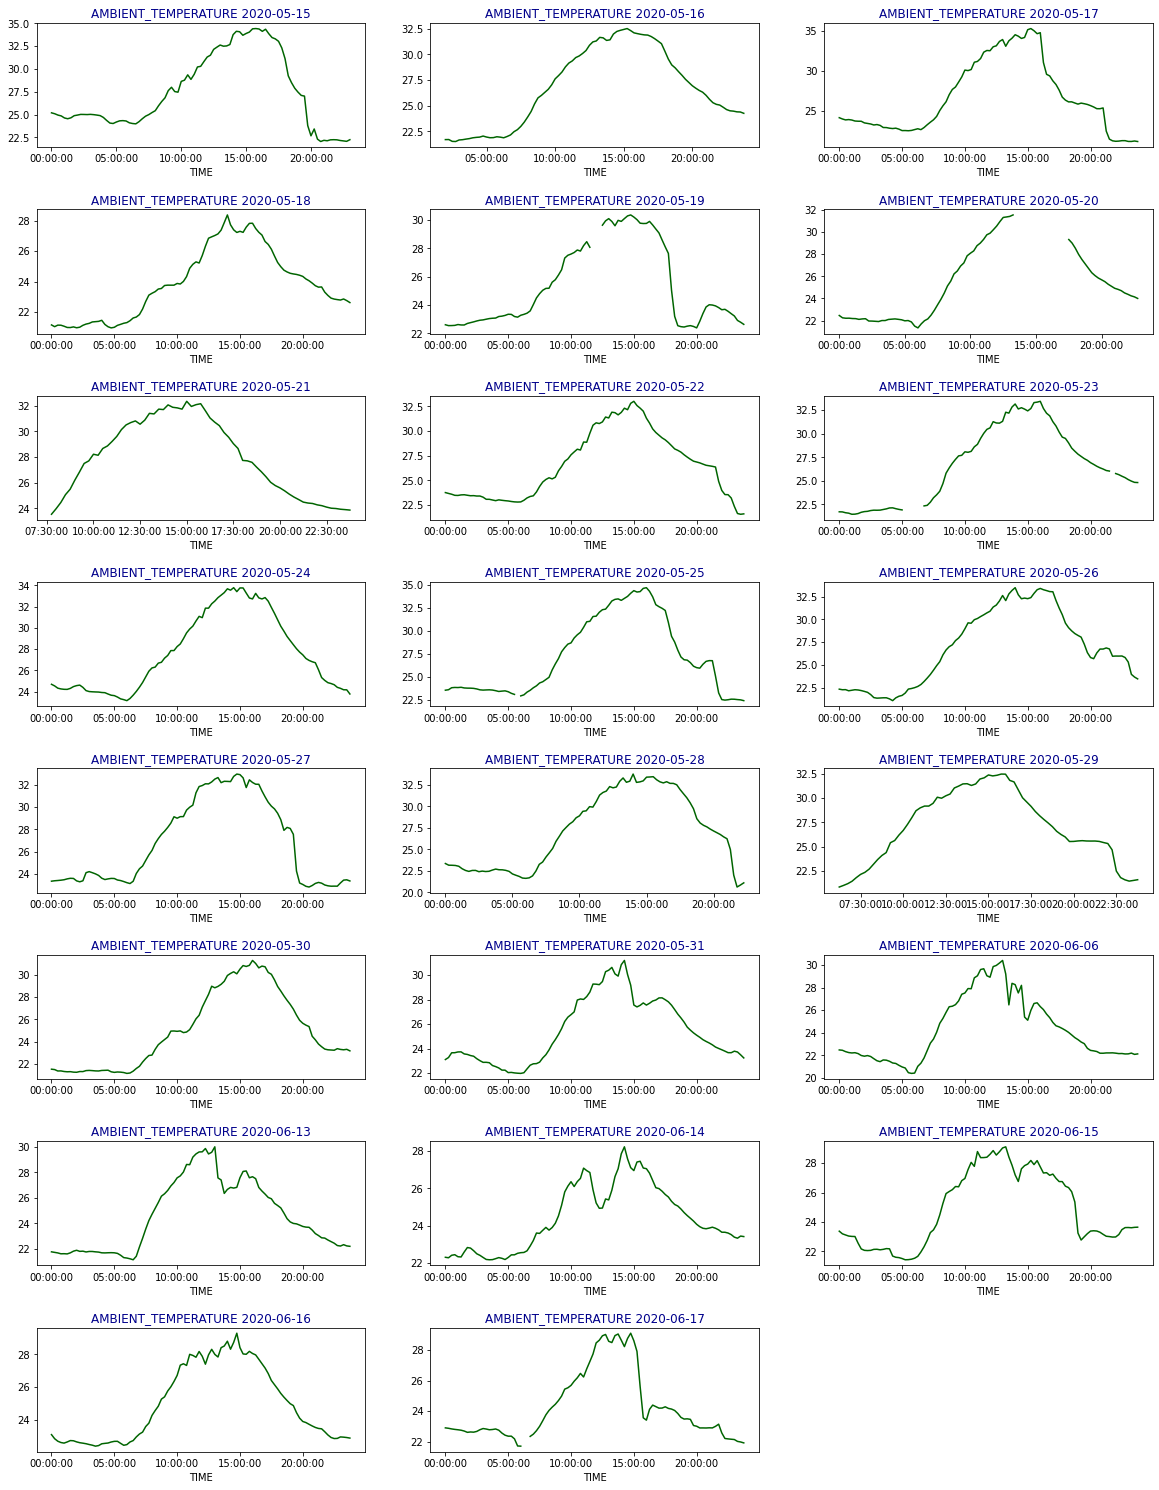

In [59]:
solar_ambiant_temp = df_solar.pivot_table(values='AMBIENT_TEMPERATURE', index='TIME', columns='DATE')

def Daywise_plot(data= None, row = None, col = None, title='AMBIENT_TEMPERATURE'):
    cols = data.columns # take all column
    gp = plt.figure(figsize=(20,40)) 
    
    gp.subplots_adjust(wspace=0.2, hspace=0.5)
    for i in range(1, len(cols)+1):
        ax = gp.add_subplot(row,col, i)
        data[cols[i-1]].plot(ax=ax, color='darkgreen')
        ax.set_title('{} {}'.format(title, cols[i-1]),color='darkblue')
        
Daywise_plot(data=solar_ambiant_temp, row=12, col=3)

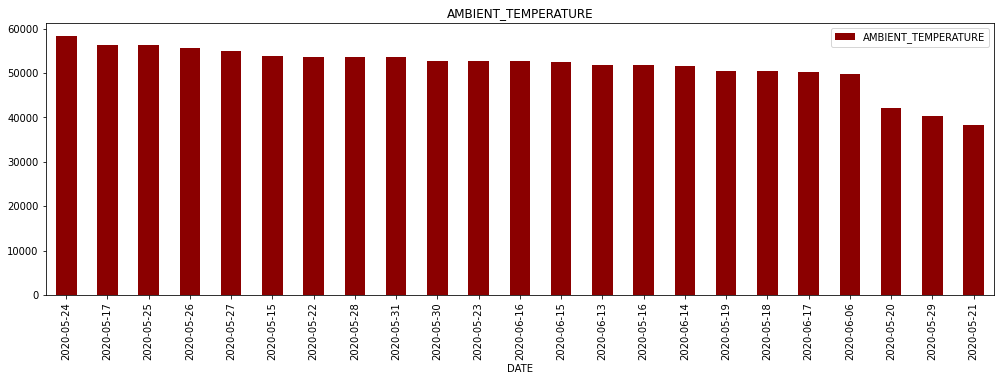

In [60]:
daily_ambient_temp = df_solar.groupby('DATE')['AMBIENT_TEMPERATURE'].agg('sum')

daily_ambient_temp.sort_values(ascending=False).plot.bar(figsize=(17,5), legend=True,color='darkred')
plt.title('AMBIENT_TEMPERATURE')
plt.show()

Comparision between Best and Worst Power generation¶

Highest average DC_POWER is generated on "2020-05-25"



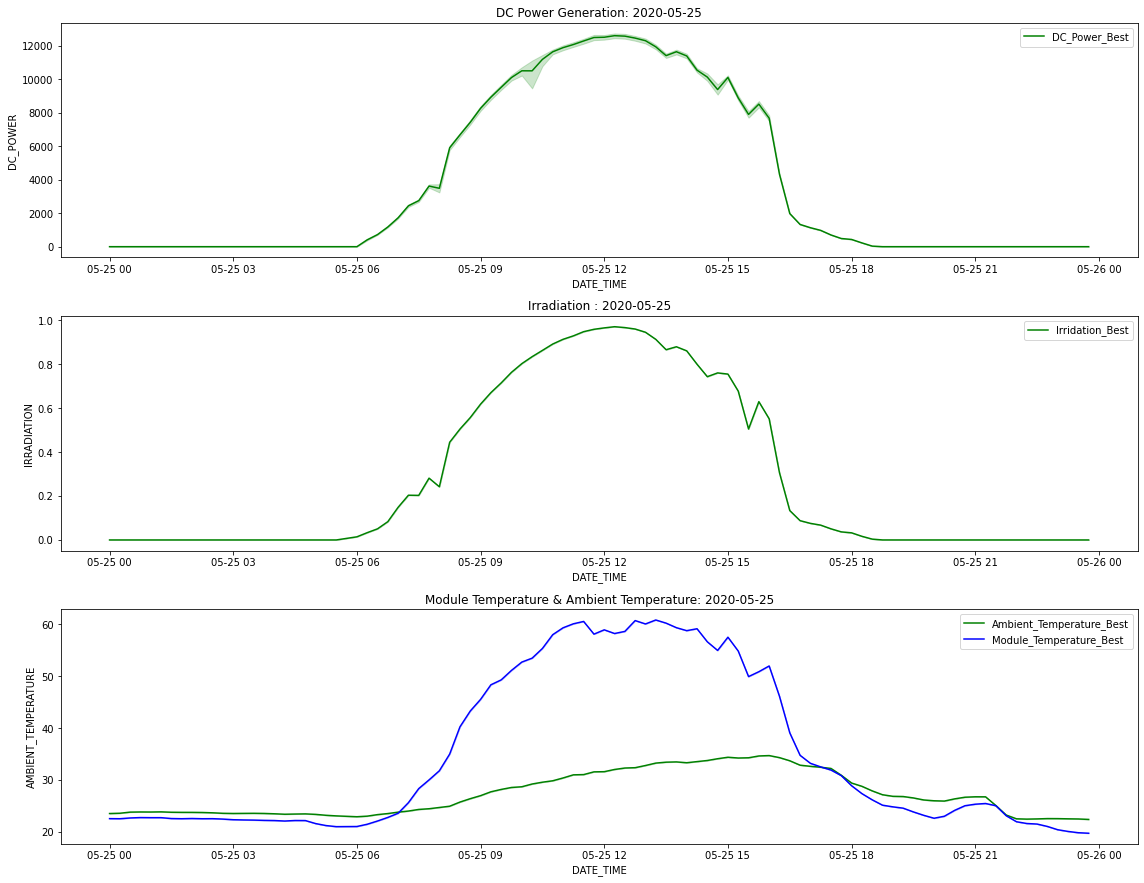

In [61]:
plt.figure(figsize=(16,16))

date=["2020-05-25"]

plt.subplot(411)
sns.lineplot(df_solar[df_solar["DATE_STRING"].isin(date)].DATE_TIME, df_solar[df_solar["DATE_STRING"].isin(date)].DC_POWER, label="DC_Power_Best",color='green');
plt.title("DC Power Generation: {}" .format(date[0]))

plt.subplot(412)
sns.lineplot(df_solar[df_solar["DATE_STRING"].isin(date)].DATE_TIME, df_solar[df_solar["DATE_STRING"].isin(date)].IRRADIATION, label="Irridation_Best",color='green');
plt.title("Irradiation : {}" .format(date[0]))

plt.subplot(413)
sns.lineplot(df_solar[df_solar["DATE_STRING"].isin(date)].DATE_TIME, df_solar[df_solar["DATE_STRING"].isin(date)].AMBIENT_TEMPERATURE, label="Ambient_Temperature_Best",color='green');
sns.lineplot(df_solar[df_solar["DATE_STRING"].isin(date)].DATE_TIME, df_solar[df_solar["DATE_STRING"].isin(date)].MODULE_TEMPERATURE, label="Module_Temperature_Best",color='blue');
plt.title("Module Temperature & Ambient Temperature: {}" .format(date[0]));

plt.tight_layout()
plt.show()

NOTE: Both DC_POWER graph and IRRADIATION graph is almost looking like an ideal graph. Weather is also looking good, and there is no cloud is in the sky because there is very less variation in IRRADIATION and temperature of the solar panel and ambient temperature.

Lowest average DC_POWER is generated on "2020-06-18"

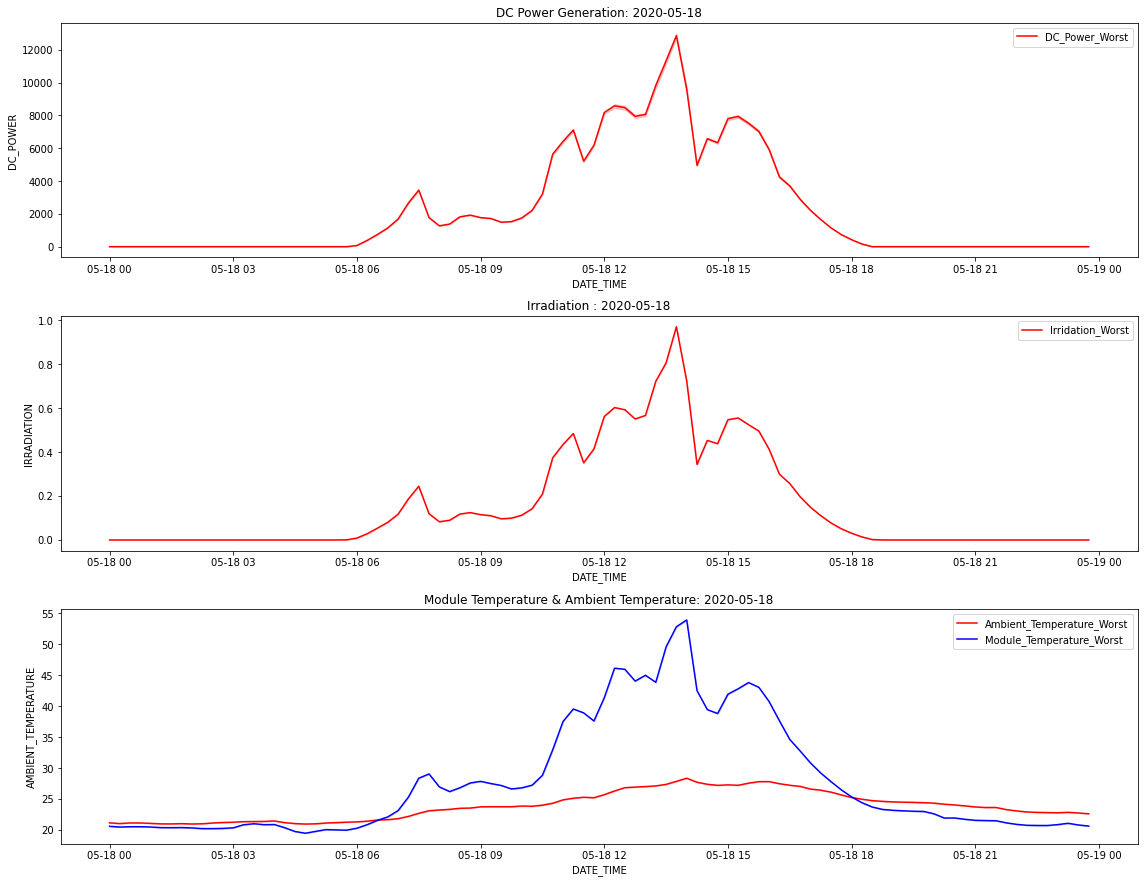

In [62]:
date=["2020-05-18"]
plt.figure(figsize=(16,16))

plt.subplot(411)
sns.lineplot(df_solar[df_solar["DATE_STRING"].isin(date)].DATE_TIME, df_solar[df_solar["DATE_STRING"].isin(date)].DC_POWER, label="DC_Power_Worst",color='red');
plt.title("DC Power Generation: {}" .format(date[0]))

plt.subplot(412)
sns.lineplot(df_solar[df_solar["DATE_STRING"].isin(date)].DATE_TIME, df_solar[df_solar["DATE_STRING"].isin(date)].IRRADIATION, label="Irridation_Worst",color='red');
plt.title("Irradiation : {}" .format(date[0]))

plt.subplot(413)
sns.lineplot(df_solar[df_solar["DATE_STRING"].isin(date)].DATE_TIME, df_solar[df_solar["DATE_STRING"].isin(date)].AMBIENT_TEMPERATURE, label="Ambient_Temperature_Worst",color='red');
sns.lineplot(df_solar[df_solar["DATE_STRING"].isin(date)].DATE_TIME, df_solar[df_solar["DATE_STRING"].isin(date)].MODULE_TEMPERATURE, label="Module_Temperature_Worst",color='blue');
plt.title("Module Temperature & Ambient Temperature: {}" .format(date[0]));

plt.tight_layout()
plt.show()

The possible reason for this reduction is due to may be heavy rain and heavily clouded sky and bad weather. There is almost very less possibility of any fault in the system


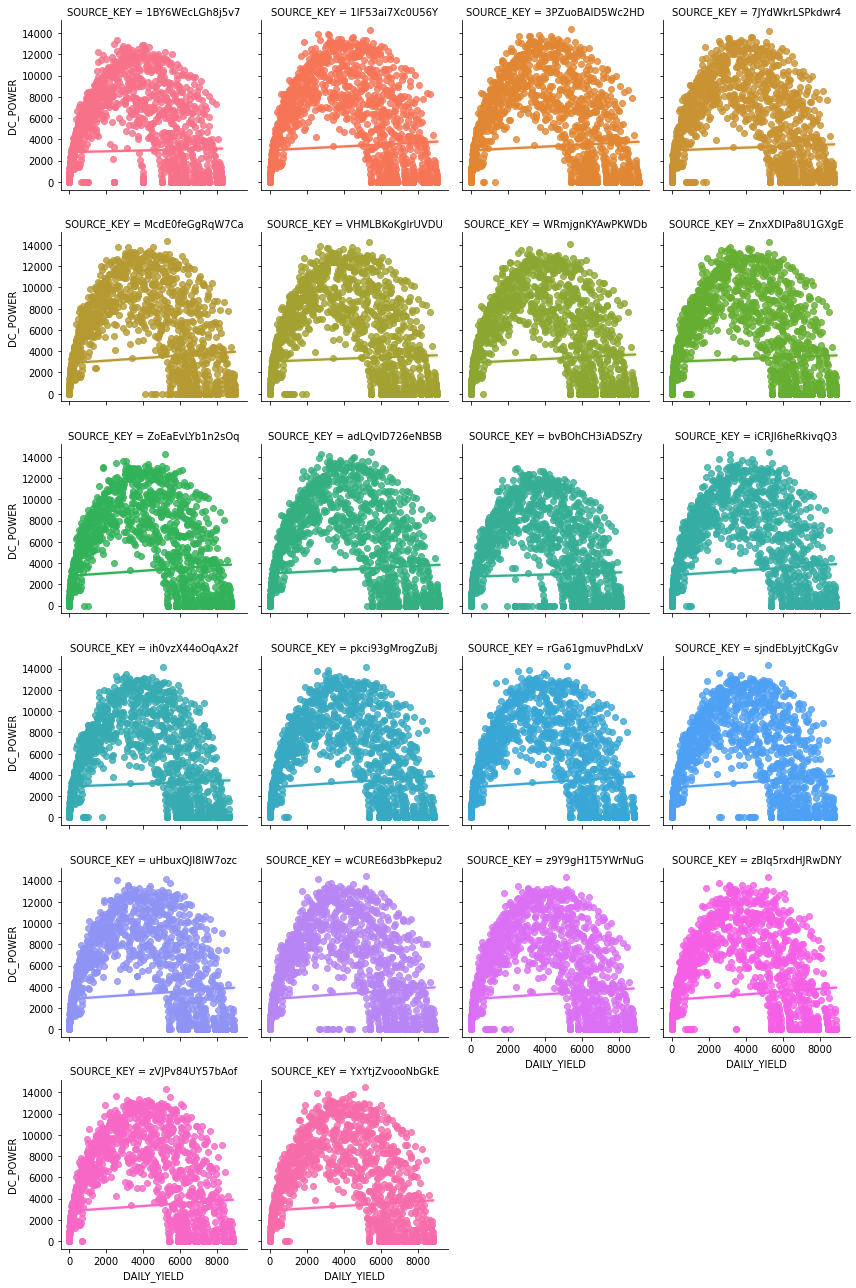

In [63]:
sns.lmplot(y="DC_POWER",x="DAILY_YIELD",hue="SOURCE_KEY",col="SOURCE_KEY",height=3,col_wrap=4,data=df_solar,fit_reg=True);

Solar Power Plant Inverter Efficiency Calculation

In [64]:
solar_dc_power = df_solar[df_solar['DC_POWER'] > 0]['DC_POWER'].values
solar_ac_power = df_solar[df_solar['AC_POWER'] > 0]['AC_POWER'].values

In [65]:
solar_dc_power.max()

14471.125

In [66]:
solar_ac_power.max()

1410.95

In [67]:
solar_plant_eff = (np.max(solar_ac_power)/np.max(solar_dc_power ))*100
print(f"Power conversion Efficiency ratio AC/DC of Solar Power Plant:  {solar_plant_eff:0.3f} %")

Power conversion Efficiency ratio AC/DC of Solar Power Plant:  9.750 %


Power conversion Efficiency ratio AC/DC of Solar Power Plant:  9.750 %

In [68]:
AC_list=[]
for i in df_solar['AC_POWER']:
    if i>0:
        AC_list.append(i)
AC_list
#AC_list.sort()
#AC_list.reverse()
len(AC_list)

24620

In [69]:
#Here we take all nonzero DC values and plot them on histogram
DC_list=[]
for i in df_solar['DC_POWER']:
    if i>0:
        DC_list.append(i)
DC_list
DC_list.sort()
DC_list.reverse()
len(DC_list)

24620

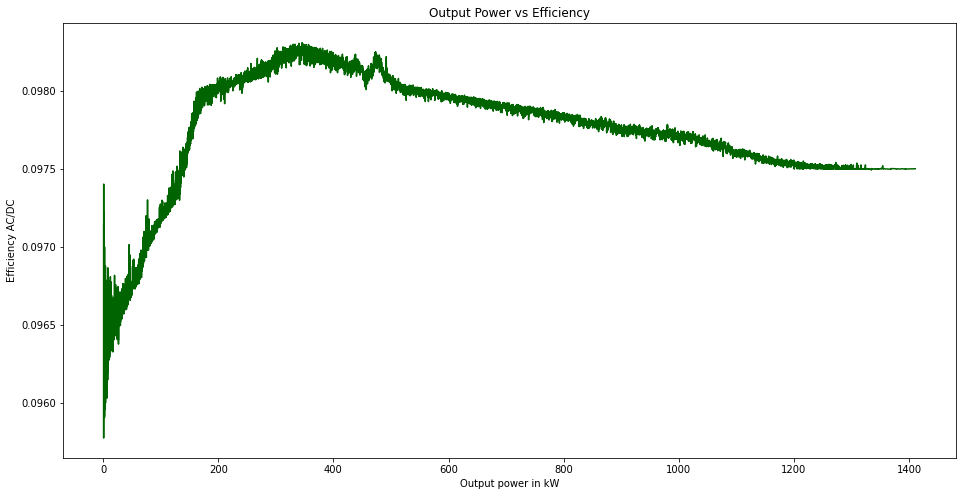

In [70]:
plt.figure(figsize=(16,8))
AC_list.sort()
DC_list.sort()
eff = [i/j for i,j in zip(AC_list,DC_list)]

plt.plot(AC_list,eff,color='darkgreen')
plt.xlabel('Output power in kW')
plt.ylabel('Efficiency AC/DC')
plt.title('Output Power vs Efficiency');

**Solar Power Prediction using different ML techniques**


In [71]:
df2 = df_solar.copy()
X = df2[['DAILY_YIELD','TOTAL_YIELD','AMBIENT_TEMPERATURE','MODULE_TEMPERATURE','IRRADIATION','DC_POWER']]
y = df2['AC_POWER']

if required we can check the values in X and y by passing the command X.head() and y.head()

In [72]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=21)


1. LinearRegression¶


In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
score_lr = 100*lr_clf.score(X_test,y_test)
print(f'LR Model score = {score_lr:4.4f}%')

LR Model score = 99.9994%


In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)
R2_Score_lr = round(r2_score(y_pred_lr,y_test) * 100, 2)

print("R2 Score : ",R2_Score_lr,"%")

R2 Score :  100.0 %


2. Random Forest Regressor¶


In [75]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
y_pred_rfr = lr.predict(X_test)
R2_Score_rfr = round(r2_score(y_pred_rfr,y_test) * 100, 2)

print("R2 Score : ",R2_Score_rfr,"%")

R2 Score :  100.0 %


3. Decision Tree Regressor¶


In [76]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)

y_pred_dtr = lr.predict(X_test)
R2_Score_dtr = round(r2_score(y_pred_dtr,y_test) * 100, 2)

print("R2 Score : ",R2_Score_dtr,"%")

R2 Score :  100.0 %


12. Result Prediction¶


In [77]:
forecast_prediction = rfr.predict(X_test)
print(forecast_prediction)

[  0.         186.26655357 970.50189286 ...   0.           0.
 363.04508929]


In [78]:
cross_check = pd.DataFrame({'Actual' : y_test , 'Predicted' : forecast_prediction})
cross_check.head()

,Actual,Predicted
39704,0.000000,0.000000
16578,186.325000,186.266554
38467,971.014286,970.501893
19471,0.000000,0.000000
21836,0.000000,0.000000


In [79]:
cross_check['Error'] = cross_check['Actual'] - cross_check['Predicted']
cross_check.head()

,Actual,Predicted,Error
39704,0.000000,0.000000,0.000000
16578,186.325000,186.266554,0.058446
38467,971.014286,970.501893,0.512393
19471,0.000000,0.000000,0.000000
21836,0.000000,0.000000,0.000000


In [80]:
cross_check_final  = cross_check[cross_check['Error'] <= 20]
cross_check_final.sample(25).style.background_gradient(
        cmap='coolwarm').set_properties(**{
            'font-family': 'Times',
            'color': 'LigntGreen',
            'font-size': '13px'
        })

,Actual,Predicted,Error
25850,0.000000,0.000000,0.000000
21825,0.000000,0.000000,0.000000
35288,0.000000,0.000000,0.000000
20403,1148.857143,1149.553625,-0.696482
859,517.050000,518.177071,-1.127071
2260,0.000000,0.000000,0.000000
15286,0.000000,0.000000,0.000000
44033,0.000000,0.000000,0.000000
6663,341.957143,341.993089,-0.035946
18472,626.971429,627.057232,-0.085804


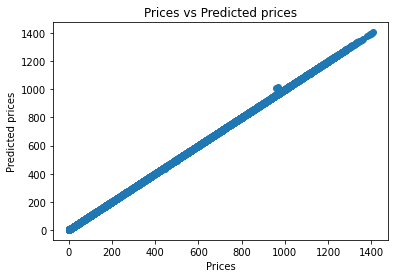

In [81]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_test,forecast_prediction)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

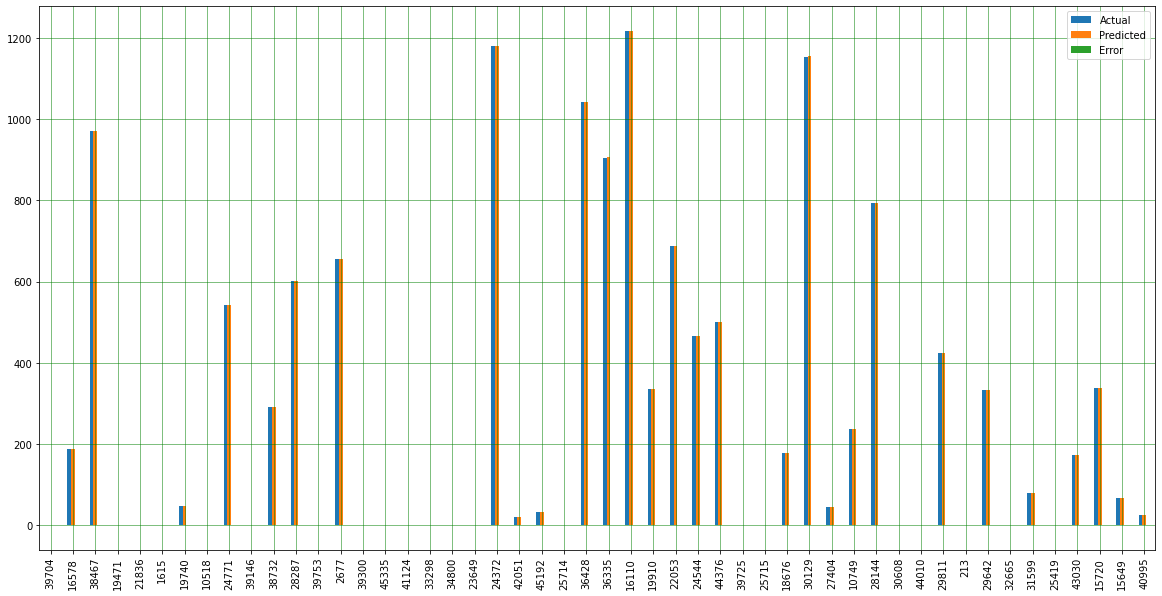

In [82]:
df3 = cross_check.head(50)
df3.plot(kind='bar',figsize=(20,10))
plt.grid(which='major', linestyle='-', linewidth='0.5',color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5',color='black')
plt.show()